In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from utils.graph import Node, DAG, HillClimbing

In [3]:
import pandas as pd

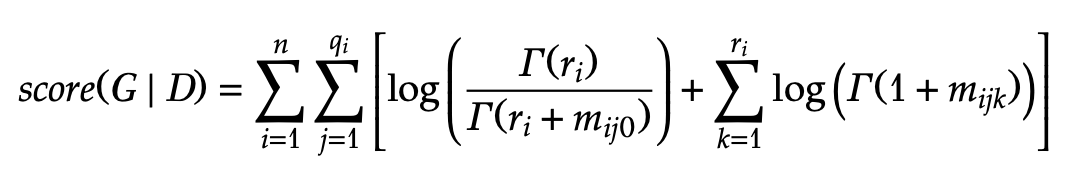
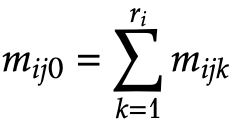

Our goal is to implement this function. Lets make sure we have everything defined:
- G = the graph
- D = the data
- n = the number of variables
- q_i = the number of possible values of the parents of Xi, which is 2^k if there are k parents and all our variables are binary
- r_i = the number of possible values our Xi variable can take
- m_ijk = the number of times in our data that the variable Xi takes the value k, and the parents of Xi take the jth configuration instantation 

In [4]:
def connect_nodes_from_edge_list(node_list, edge_list):
    for edge in edge_list:
        node_name = edge[1]
        parent_name = edge[0]
        child = None
        parent = None
        for node in node_list:
            if (node.variable == node_name):
                child = node
                break
        for node in node_list:
            if (node.variable == parent_name):
                parent = node
                break
        if (child != None and parent != None):
            child.add_prev(parent)
    return node_list

# Titanic Dataset

In [5]:
titanic_df = pd.read_csv("small.csv")

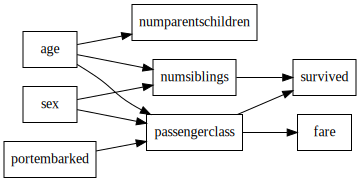

In [18]:
# Draw the hand picked Titanic data set

edge_list = [
    ('age','numparentschildren'),
    ('age','numsiblings'), 
    ('age','passengerclass'),
    ('sex','passengerclass'),
    ('sex','numsiblings'),
    ('passengerclass','fare'),
    ('passengerclass','survived'),
    ('portembarked','passengerclass'),
    ('numsiblings','survived')
]

hand_made_dag = DAG(nodes=connect_nodes_from_edge_list([Node(variable=col, prev=[]) for col in titanic_df.columns], edge_list=edge_list), randomize=False)
hand_made_dag.draw_dot_from_digraph()

In [22]:
# Compare the output of our two score functions
print(f"Slow score function: {hand_made_dag.bayesian_dirichilet_score(titanic_df)}")
print(f"Fast score function {hand_made_dag.bayesian_dirichilet_score_fast(titanic_df)}")

Slow score function: -4032.6119571830086
Fast score function -4032.6119571830086


-4032.6119571830086
-3820.285740305114


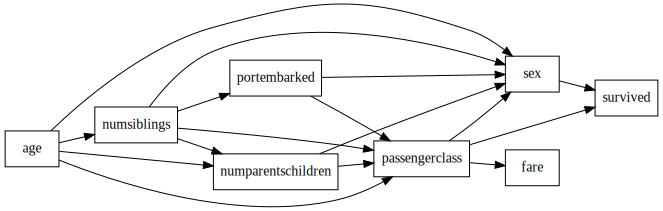

In [15]:
# Train our handmade DAG for 1000 iterations
print(hand_made_dag.bayesian_dirichilet_score_fast(titanic_df))
searcher = HillClimbing(hand_made_dag, titanic_df, max_iteration=1000)
best_handmade, best_handmade_score = searcher.solve()
print(best_handmade_score)
best_handmade.draw_dot_from_digraph()

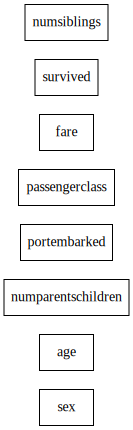

In [11]:
empty_nodes = [Node(variable=col, prev=[]) for col in titanic_df.columns]
empty_graph = DAG(nodes=empty_nodes, randomize=False)
empty_graph.draw_dot_from_digraph()

In [24]:
empty_graph.bayesian_dirichilet_score_fast(titanic_df)

-4166.225858784904

In [25]:
empty_graph.bayesian_dirichilet_score(titanic_df)

-4166.225858784904

-4166.225858784904
-3799.4840101250174


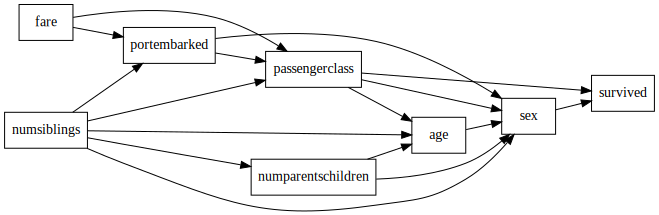

In [26]:
print(empty_graph.bayesian_dirichilet_score_fast(titanic_df))
searcher = HillClimbing(empty_graph, titanic_df, max_iteration=1000)
best_from_empty, best_from_empty_score = searcher.solve()
print(best_from_empty_score)
best_from_empty.draw_dot_from_digraph()

# Wine Dataset

In [6]:
wine_df = pd.read_csv("medium.csv")
wine_df.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'ph',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

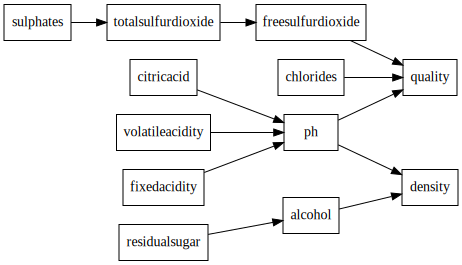

In [31]:

edge_list = [
    ('fixedacidity','ph'),
    ('volatileacidity','ph'), 
    ('citricacid','ph'),
    ('ph','quality'),
    ('ph','density'),
    ('residualsugar','alcohol'),
    ('alcohol','density'),
    ('denisty','quality'),
    ('sulphates','totalsulfurdioxide'),
    ('totalsulfurdioxide','freesulfurdioxide'),
    ('freesulfurdioxide','quality'),
    ('chlorides','quality')
]

hand_made_dag = DAG(nodes=connect_nodes_from_edge_list([Node(variable=col, prev=[]) for col in wine_df.columns], edge_list=edge_list), randomize=False)
hand_made_dag.draw_dot_from_digraph()

-44049.382151591904
-42193.37254565337


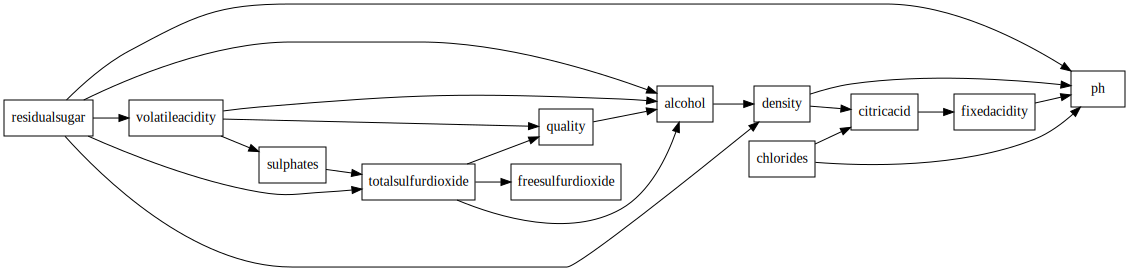

In [39]:
print(hand_made_dag.bayesian_dirichilet_score_fast(wine_df))
searcher = HillClimbing(hand_made_dag, wine_df, max_iteration=2000)
best_handmade, best_handmade_score = searcher.solve()
print(best_handmade_score)
best_handmade.draw_dot_from_digraph()

In [42]:
best_handmade_score

-42193.37254565337

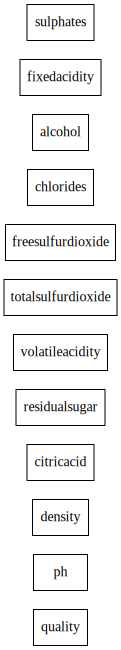

In [33]:
empty_nodes = [Node(variable=col, prev=[]) for col in wine_df.columns]
empty_graph = DAG(nodes=empty_nodes, randomize=False)
empty_graph.draw_dot_from_digraph()

-45367.62511363246
-41919.15747211693


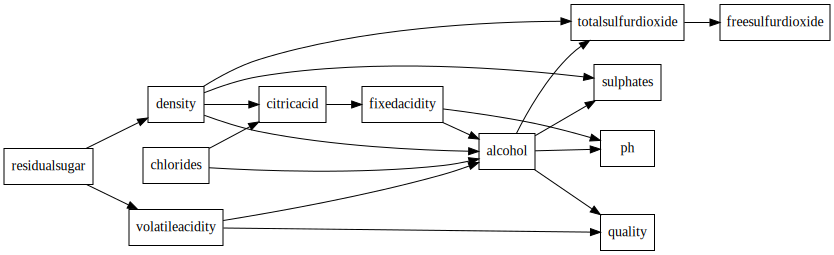

In [34]:
print(empty_graph.bayesian_dirichilet_score_fast(wine_df))
searcher = HillClimbing(empty_graph, wine_df, max_iteration=2000)
best_handmade, best_handmade_score = searcher.solve()
print(best_handmade_score)
best_handmade.draw_dot_from_digraph()

In [7]:
empty_titanic = -4166.225858784904
handmade_titanic = -4032.6119571830086
trained_handmade_titanic = -3820.285740305114
trained_empty_titanic = -3799.4840101250174

titanic_scores = [empty_titanic, handmade_titanic, trained_handmade_titanic, trained_empty_titanic]

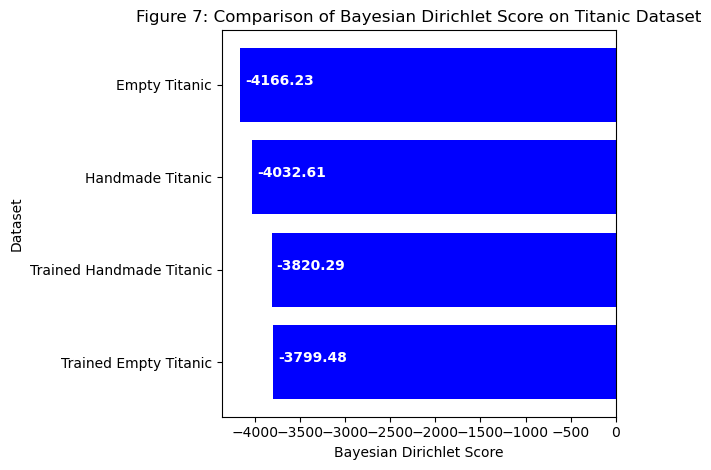

In [13]:
import matplotlib.pyplot as plt

data = [empty_titanic, handmade_titanic, trained_handmade_titanic, trained_empty_titanic]
labels = ['Empty Titanic', 'Handmade Titanic', 'Trained Handmade Titanic', 'Trained Empty Titanic']

fig, ax = plt.subplots()
ax.barh(labels, data, align='center', color='b')
ax.invert_yaxis()
ax.set_title('Figure 7: Comparison of Bayesian Dirichlet Score on Titanic Dataset')
ax.set_xlabel('Bayesian Dirichlet Score')
ax.set_ylabel('Dataset')
for i, v in enumerate(data):
    ax.text(v + 50, i, str(round(v, 2)), color='white', fontweight='bold')
fig.tight_layout()
plt.show()

In [15]:
empty_wine = -45367.62511363246
handmade_wine = -44049.382151591904
trained_handmade_wine = -42193.37254565337
trained_empty_wine = -41919.15747211693



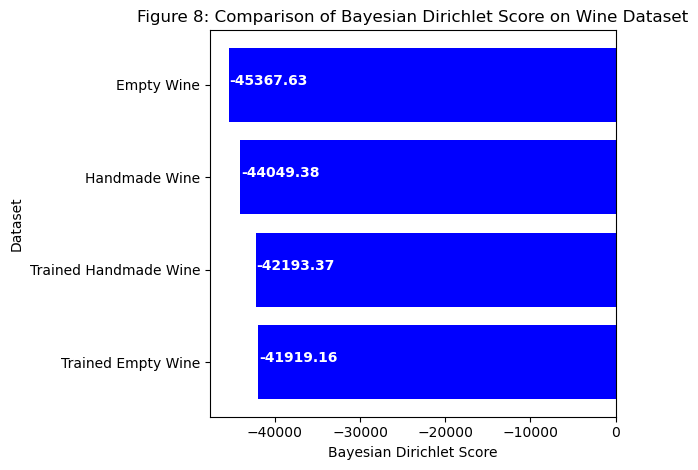

In [17]:
data = [empty_wine, handmade_wine, trained_handmade_wine, trained_empty_wine]
labels = ['Empty Wine', 'Handmade Wine', 'Trained Handmade Wine', 'Trained Empty Wine']

fig, ax = plt.subplots()
ax.barh(labels, data, align='center', color='b')
ax.invert_yaxis()
ax.set_title('Figure 8: Comparison of Bayesian Dirichlet Score on Wine Dataset')
ax.set_xlabel('Bayesian Dirichlet Score')
ax.set_ylabel('Dataset')
for i, v in enumerate(data):
    ax.text(v + 50, i, str(round(v, 2)), color='white', fontweight='bold')
fig.tight_layout()
plt.show()